 # 1-IMPORT


In [8]:
import numpy as np


In [9]:
import pandas as pd


In [10]:

from IPython.core.display import HTML

In [11]:
import math

In [12]:
import inflection

In [13]:
import seaborn as sns

In [14]:

from matplotlib import pyplot as plt

In [15]:
from scipy import stats as ss

In [16]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [17]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [18]:

from boruta import BorutaPy


In [19]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24
display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )
sns.set()


In [20]:
jupyter_settings()


Populating the interactive namespace from numpy and matplotlib


# LOADING DATE

In [21]:
df_sales_raw= pd.read_csv( 'C:/Users/FLAVIA/repor/pythonProject/train.csv',low_memory=False )

df_store_raw= pd.read_csv( 'C:/Users/FLAVIA/repor/pythonProject/store.csv', low_memory=False )
#merge
df_raw=pd.merge(df_sales_raw,df_store_raw, how='left',on='Store')

In [22]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
962021,562,2,2013-02-19,19604,3157,1,1,0,0,b,c,1210.0,NaN,NaN,0,NaN,NaN,NaN


# 3 DESCRIÇÃO DE DADOS

In [23]:
df1=df_raw.copy()

In [24]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

##  3.1 RENAME COLUMNS

In [25]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase=lambda x:inflection.underscore (x)

cols_new=list(map(snakecase,cols_old))
#rename
df1.columns=cols_new

In [26]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 3.2  Data Dimensions ( para saber quantas linhas e colunas)

In [27]:
print( 'Number of Rows:{}'.format(df1.shape[0]))
print( 'Number of Cols:{}'.format(df1.shape[1]))

Number of Rows:1017209
Number of Cols:18


## 3.3 DataTypes( mudar date que está como object para datetime64)

In [28]:
df1['date']=pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 3.4 Check NA

In [29]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 3.5 Fillout NA( preencher os NA)

In [30]:
df1['competition_distance'].max()

75860.0

In [31]:
#competition_distacnce
df1['competition_distance']=df1['competition_distance'].apply (lambda x: 200000.0 if math.isnan(x) else  x)
#competition_open_since_month 
df1['competition_open_since_month']=df1.apply (lambda x:x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'],axis=1)
#competition_open_since_year
df1['competition_open_since_year']=df1.apply (lambda x:x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'],axis=1)
#promo2                               
#promo2_since_week  
df1['promo2_since_week']=df1.apply (lambda x:x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)
#promo2_since_year   
df1['promo2_since_year']=df1.apply (lambda x:x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'],axis=1)
#promo_interval                   
month_map={1:'Jan',2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dez'}
df1['promo_interval'].fillna(0,inplace=True)
df1['month_map']=df1['date'].dt.month.map(month_map)
df1['is_promo']=df1[['promo_interval', 'month_map']].apply(lambda x:0 if x['promo_interval']==0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [32]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [33]:
df1.sample(5).T

,741133,973573,114272,619593,954060
store,444,964,543,439,406
day_of_week,4,6,1,1,2
date,2013-09-05 00:00:00,2013-02-09 00:00:00,2015-04-20 00:00:00,2013-12-23 00:00:00,2013-02-26 00:00:00
sales,7467,8348,1819,12658,3094
customers,968,1242,190,1519,274
open,1,1,1,1,1
promo,0,0,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,1,0
store_type,c,a,c,a,d


## 3.6 Change Types

In [34]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [35]:
df1['competition_open_since_month']=df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year']=df1['competition_open_since_year'].astype(int)
df1['promo2_since_week']=df1['promo2_since_week'].astype(int)
df1['promo2_since_year']=df1['promo2_since_year'].astype(int)

In [36]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 3.7 Descriptive Statitical

In [37]:
num_attributes=df1.select_dtypes(include=['int64','float64'])
cat_attributes=df1.select_dtypes(include=['int64','float64', 'datetime64[ns]'])

In [38]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
138015,871,1,9598,636,1,1,1,10620.0,0,0
596747,1008,1,3542,569,1,0,0,30.0,0,0


In [39]:
cat_attributes.sample(2)

,store,day_of_week,date,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
570389,295,3,2014-02-05,5770,663,1,1,0,210.0,1,0
219568,1029,5,2015-01-16,6065,831,1,1,0,1590.0,0,0


## 3.7.1 Numerical Attributes

In [40]:
# central Tendency-mean and median
ct1= pd.DataFrame(num_attributes.apply(np.mean)).T
ct2= pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion-max, min , std, range, skew, kurtosis
d1=pd.DataFrame(num_attributes.apply(np.std)).T
d2=pd.DataFrame(num_attributes.apply( min )).T
d3=pd.DataFrame(num_attributes.apply(max)).T
d4=pd.DataFrame(num_attributes.apply(lambda x:x.max()-x.min() )).T
d5=pd.DataFrame(num_attributes.apply(lambda x:x.skew() )).T
d6=pd.DataFrame(num_attributes.apply(lambda x:x.kurtosis() )).T
#Concatenate
m= pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns=['attributes', 'min', 'max','range', 'mean', 'median','std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.159901,0.0,0.366514,1.855857,1.444209


C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

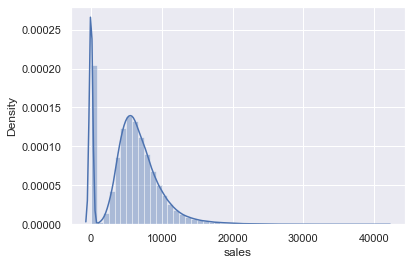

In [41]:
sns.distplot(df1['sales'])

C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

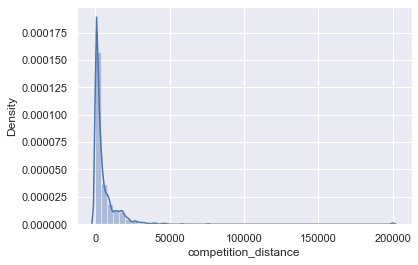

In [42]:
sns.distplot(df1['competition_distance'])

## 3.7.2 Categorial Attributes

In [43]:
cat_attributes.apply(lambda x: x.unique().shape[0])

store                    1115
day_of_week                 7
date                      942
sales                   21734
customers                4086
open                        2
promo                       2
school_holiday              2
competition_distance      655
promo2                      2
is_promo                    2
dtype: int64

<AxesSubplot:xlabel='school_holiday', ylabel='sales'>

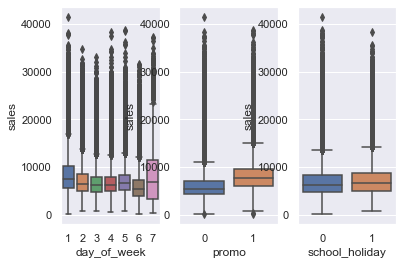

In [44]:
aux1=df1[(df1['day_of_week']!= 0) & (df1['sales']>0)]

plt.subplot(1,3,1)
sns.boxplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='promo', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='school_holiday', y='sales', data=aux1)

In [45]:
from PIL import Image

# 4.0 Feature Enginner

## 4.1 MAPA MENTAL DE HIPÓTESES

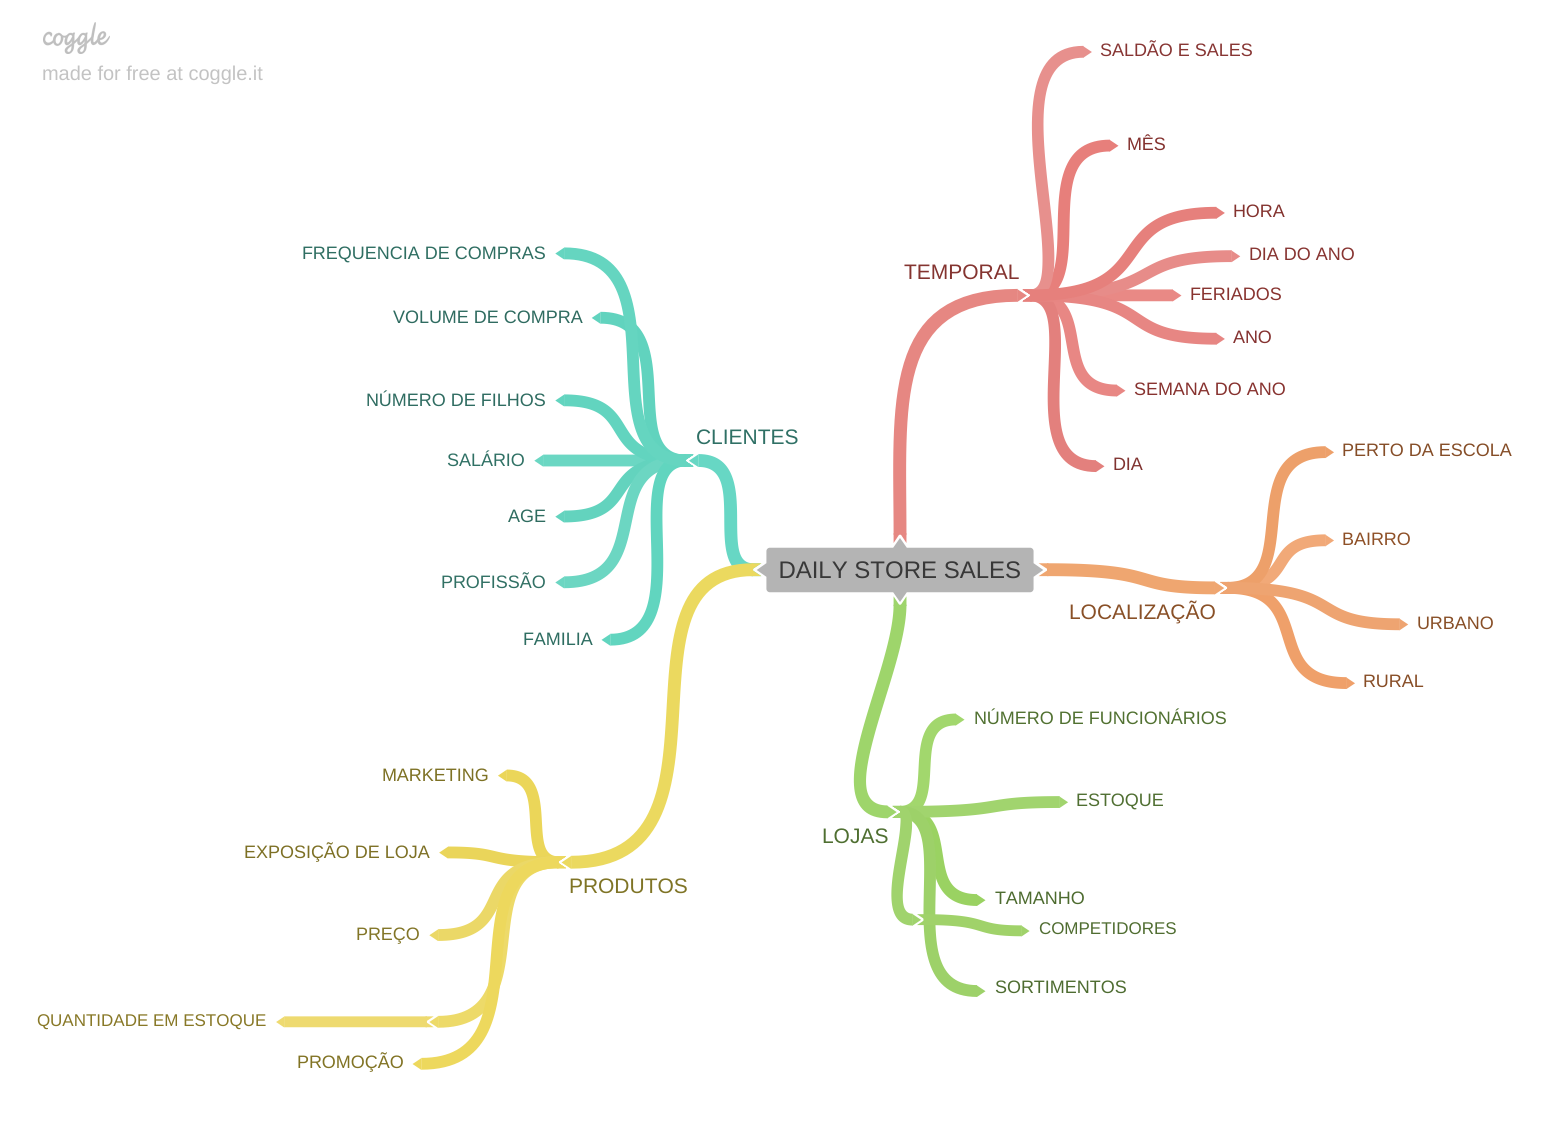

In [46]:
from IPython.display import Image
Image('C:/Users/FLAVIA/Downloads/MIND MAP HIPOTESES.png')
      

## 4.2 CRIAÇÃO DAS HIPÓTESES

In [47]:
#**1** LOJA MAIOR NÚMERO DE FUNCIONÁRIO VENDE MAIS
#**2** LOJA COM MAIOR ESTOQUE VENDE MAIS
#**3** LOJA COM MAIOR PORTE DEVERIA VENDER MAIS
#**4** LOJA COM MENOR PORTE DEVERIA VENDER MENOS
#**5** LOJA COM MAIOR SORTIMENTO VENDE MAIS


## 4.2.2 HIPOTESE DO PRODUTO

In [48]:
#**1** LOJA QUE POSSUI MARKETING DEVERIA VENDER MAIS
#**2** LOJA QUE EXPOEM MAIS O PRODUTO NAS VITRINES DEVERIA VENDER MAIS
#**3** LOJA QUE TEM PREÇOS MENORES NOS PRODUTOS DEVERIA VENDER MAIS
#**4** LOJA QUE POSSUE PREÇOS MENORES POR LONGOS TEMPO DEVERIA VENDER MAIS
#**5** LOJAS COM COMPETIDORES MAIS PRÓXIMOS DEVERIA VENDER MENOS
#**6** LOJAS COM COMPETIDORES A MAIS TEMPO DEVRIA VENDER MAIS


## 4.2.3 HIPOTESE DO TEMPO

In [49]:
#**1** LOJA QUE TEM MAIS FERIADOS DEVERIAM VENDER MENOS
#**2** LOJAS QUE ABREM NOS PRIMEIROS SEIS MESES DEVERIAM VENDER MAIS
#**3** LOJAS QUE ABREM NOS FINAIS DE SEMANA DEVERIAM VENDER MAIS


## 4.3 LISTA FINAL DE HIPÓTESES( PEGAR AS HIPOTESES QUE EU TENHO OS DADOS)


In [51]:
**1** LOJA COM MAIOR SORTIMENTO VENDE MAIS
**2** LOJAS COM COMPETIDORES MAIS PRÓXIMOS DEVERIA VENDER MENOS
**3** LOJAS COM COMPETIDORES A MAIS TEMPO DEVRIA VENDER MAIS
**4** LOJAS COM PROMOÇÕES MAIS ATIVAS DEVRIAM VENDER MAIS
**5** LOJAS COM MAIS DIAS DE PROMOÇÃO DEVERIA VENDER MAIS
**6** LOJAS COM MAIS PROMOÇÕES CONSECUTIVAS DEVERIAM VENDER MAIS
**7** LOJAS ABERTAS NO FERIADOS DE NATAL DEVERIA VENDER MAIS
**8** LOJAS DEVERIAM VENDER MAIS AO LONGO DOS ANOS
**9** LOJAS DEVERIAM VENDER MAIS NO SEGUNDO SEMESTRE DO ANO
**10**LOJAS DEVERIAM VENDER MAIS DEPOIS DO DIA 10 DE CADA MES
**11** LOJAS DEVERIAM VENDER MENOS NOS FINAIS DE SEMANA
**12** LOJAS DEVERIAM VENDER MENO NOS FERIADOS ESCOLARES



SyntaxError: invalid syntax (Temp/ipykernel_60816/2051337967.py, line 1)

In [52]:
df2=df1.copy()

In [53]:
#year
df2['year']=df2['date'].dt.year
#month
df2['month']=df2['date'].dt.month
#day
df2['day']=df2['date'].dt.day
#week of year
df2['week_of_year']=df2['date'].dt.weekofyear
#year week
df2['year_week']=df2['date'].dt.strftime('%Y-&W')
#competition since
df2 ['competition_since']=df2.apply( lambda x:datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1),axis=1)
df2['competition_time_month']= (( df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since']= df2['promo2_since_year'].astype(str) +'-'+df2['promo2_since_week'].astype(str)
df2['promo_since']= df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w')-datetime.timedelta(days=7))
df2['promo_time_week']=(( df2['date']-df2['promo_since'])/7).apply(lambda x: x.days).astype(int)
#assortment( verificar no site quem é a,b e c)
df2 ['assortment']=df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')
#state holiday (a=public holiday, Easter holiday, christmas)
df2['state_holiday']= df2['state_holiday'].apply( lambda x: 'public holiday'if x== 'a' else 'easter holiday' if x =='b' else 'christmas'if x== 'c' else 'regular day')

C:\Users\FLAVIA\AppData\Local\Temp/ipykernel_60816/1815759741.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year']=df2['date'].dt.weekofyear


In [54]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-&W,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-&W,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-&W,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-&W,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-&W,2015-04-01,4,2015-07-27,0


In [55]:
df2.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 5.1 FILTRAGENS DAS LINHAS

In [58]:
df3 = df2.copy()

In [59]:
 df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]


# 5.2 SELEÇÃO DAS COLUNAS cols drop( delenas colunas que não são importantes)

In [60]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis=1 )


In [61]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 6. analise exploratória de Dados

In [125]:
df4=df3.copy()

In [126]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

## 6.1 analise Univariada

### 6.1.2 Response Variable

C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

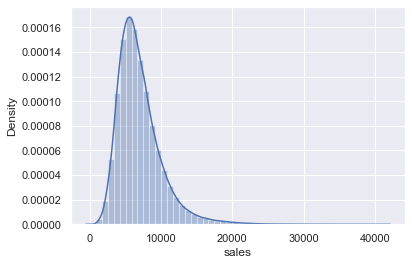

In [127]:
sns.distplot(df4['sales'])

### 6.1.3 Numerical Variable

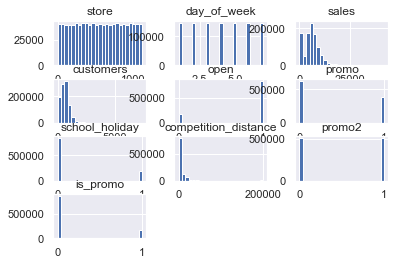

In [128]:
num_attributes.hist(bins=25);

### 6.1.4 Categorical Variable

In [129]:
cat_attributes.head()

,store,day_of_week,date,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,570.0,1,1
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,1,1
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,29910.0,0,0


In [130]:
df4['state_holiday'].drop_duplicates()

0            regular day
63559     public holiday
129424    easter holiday
241126         christmas
Name: state_holiday, dtype: object

C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state_holiday', ylabel='count'>

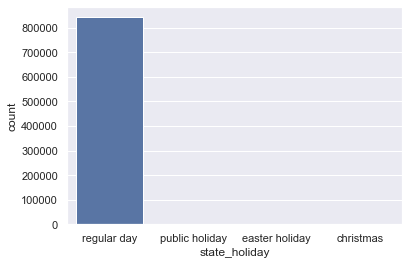

In [131]:
#State Holiday
sns.countplot(df4['state_holiday'])

C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

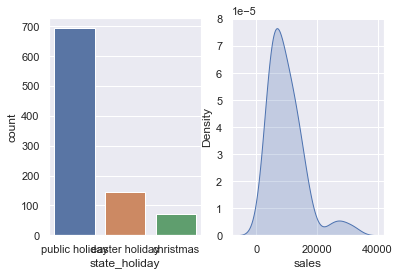

In [132]:
plt.subplot(1,2,1)

a=df4[df4['state_holiday'] != 'regular day']

sns.countplot(a['state_holiday'])
plt.subplot(1,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday'] ['sales'], label ='public_holiday', shade= True)

sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday'] ['sales'], label ='easter_holiday', shade= True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas'] ['sales'], label ='christmas', shade= True)

In [133]:
#store Type

df4['store_type'].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

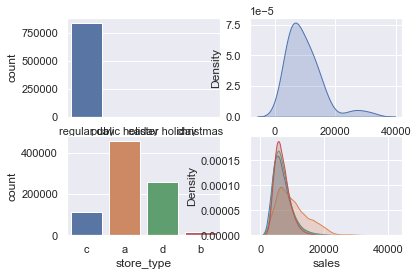

In [134]:
#state holiday

plt.subplot(2,2,1)

a=df4[df4['state_holiday'] != 'regular day']

sns.countplot(df4['state_holiday'])
plt.subplot(2,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday'] ['sales'], label ='public_holiday', shade= True)

sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday'] ['sales'], label ='easter_holiday', shade= True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas'] ['sales'], label ='christmas', shade= True)

#store holiday
plt.subplot(2,2,3)

a=df4[df4['store_type'] != 'regular day']

sns.countplot(df4['store_type'])
plt.subplot(2,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a'] ['sales'], label ='a', shade= True)

sns.kdeplot(df4[df4['store_type'] == 'b'] ['sales'], label ='b', shade= True)
sns.kdeplot(df4[df4['store_type'] == 'c'] ['sales'], label ='c', shade= True)
sns.kdeplot(df4[df4['store_type'] == 'd'] ['sales'], label ='d', shade= True)

In [135]:
#assortment

df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

<AxesSubplot:xlabel='sales', ylabel='Density'>

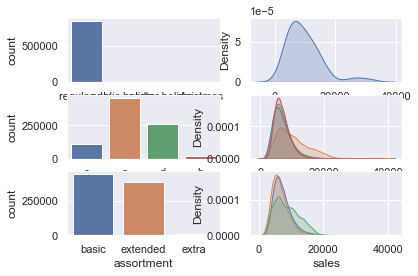

In [136]:
#state holiday

plt.subplot(3,2,1)

a=df4[df4['state_holiday'] != 'regular day']

sns.countplot(df4['state_holiday'])
plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday'] ['sales'], label ='public_holiday', shade= True)

sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday'] ['sales'], label ='easter_holiday', shade= True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas'] ['sales'], label ='christmas', shade= True)

#store holiday
plt.subplot(3,2,3)

a=df4[df4['store_type'] != 'regular day']

sns.countplot(df4['store_type'])
plt.subplot(3,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a'] ['sales'], label ='a', shade= True)

sns.kdeplot(df4[df4['store_type'] == 'b'] ['sales'], label ='b', shade= True)
sns.kdeplot(df4[df4['store_type'] == 'c'] ['sales'], label ='c', shade= True)
sns.kdeplot(df4[df4['store_type'] == 'd'] ['sales'], label ='d', shade= True)
#assortment
plt.subplot(3,2,5)
sns.countplot(df4['assortment'])

plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment'] == 'extended'] ['sales'], label ='extended', shade= True)
sns.kdeplot(df4[df4['assortment'] == 'basic'] ['sales'], label ='basic', shade= True)
sns.kdeplot(df4[df4['assortment'] == 'extra'] ['sales'], label ='extra', shade= True)




## 6.2 analise Bivariada

# hIPOTESE 1- LOJA COM MAIOR SORTIMENTO VENDE MAIS
## (depois da análise dos gráficos verificamos que a hipótese FALSA lojas com maior sortimento vende menos)


<AxesSubplot:xlabel='year_week'>

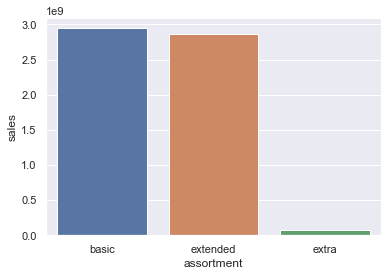

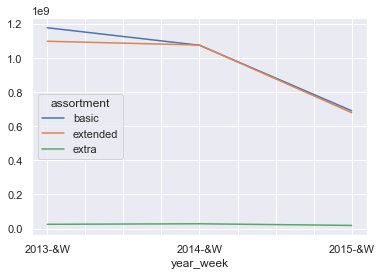

In [137]:
aux1=df4[[ 'assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1);

aux2=df4[['year_week','assortment', 'sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot()

# HIPOTESE2- LOJAS COM COMPETIDORES MAIS PRÓXIMOS DEVERIA VENDER MENOS
#De acordo com os gráficos e análises verificamos que a hipotese é FALSA, competidores mais próximos vendem mais 


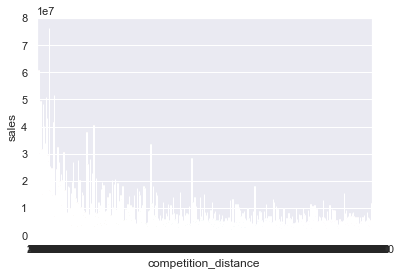

In [138]:

aux1=df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
sns.barplot(x='competition_distance', y='sales', data=aux1);
##dificil de ver esse gráfico o melhor é fazer em grupo

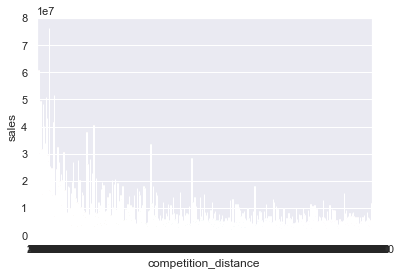

In [139]:
aux1=df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
bins=list(np.arange(0,20000,1000))
aux1['competition_ditance_binned']=pd.cut(aux1['competition_distance'],bins=bins)
sns.barplot(x='competition_distance', y='sales', data=aux1);


In [140]:
aux1.head()

,competition_distance,sales,competition_ditance_binned
0,20.0,4579807,"(0, 1000]"
1,30.0,17552666,"(0, 1000]"
2,40.0,29261626,"(0, 1000]"
3,50.0,60835848,"(0, 1000]"
4,60.0,22088359,"(0, 1000]"


In [141]:
aux1.sample(5)

,competition_distance,sales,competition_ditance_binned
21,230.0,13895113,"(0, 1000]"
318,4360.0,5269496,"(4000, 5000]"
32,340.0,41585771,"(0, 1000]"
391,6330.0,3762920,"(6000, 7000]"
74,770.0,10900333,"(0, 1000]"


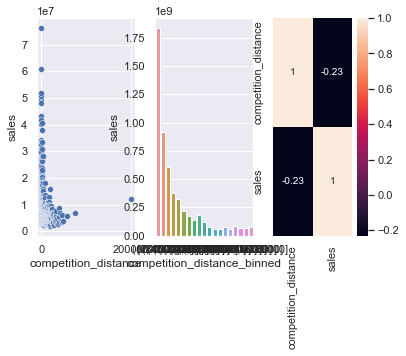

In [142]:
# mesmo gráfico de cima porém melhor de visualizar o gráfico.
plt.subplot(1,3,1)
sns.scatterplot(x='competition_distance', y='sales', data=aux1);
plt.subplot(1,3,2)
bins=list(np.arange(0,20000,1000))

aux1['competition_distance_binned']=pd.cut(aux1['competition_distance'],bins=bins)

aux2=aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()

sns.barplot(x='competition_distance_binned', y='sales', data=aux2);
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);



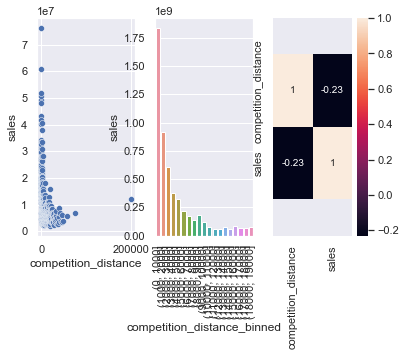

In [143]:
# mesmo gráfico de cima porém melhor de visualizar o gráfico.
plt.subplot(1,3,1)
sns.scatterplot(x='competition_distance', y='sales', data=aux1);
plt.subplot(1,3,2)
bins=list(np.arange(0,20000,1000))

aux1['competition_distance_binned']=pd.cut(aux1['competition_distance'],bins=bins)

aux2=aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()

sns.barplot(x='competition_distance_binned', y='sales', data=aux2);
plt.xticks(rotation=90);

plt.subplot(1,3,3)
x=sns.heatmap(aux1.corr(method='pearson'),annot=True);
bottom, top=x.get_ylim()
x.set_ylim(bottom+0.5,top-0.5);

#a correlação vai de 1 até -1 . Quanto mais próximo de zero mais fraca é a correlação. Quanto mais próximo de 1 e -1 mais forte é a correlação. logo -0,23 significa que mais distante o meu concorrente está menor a venda.

# HIPÓTESE 3- LOJAS COM COMPETIDORES A MAIS TEMPO DEVERIAM VENDER MAIS
#de acordo com os gráficos verificamos que é ao contrário lojas com competidores mais recente vendem mais. Logo essa hipotese é FALSA. Lojas com competidores a mais tempo vendem MENOS


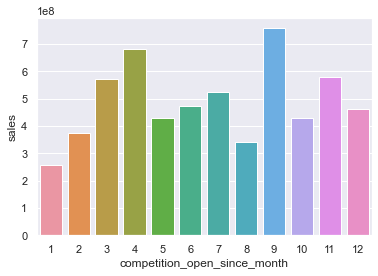

In [144]:
aux1= df4[['competition_open_since_month','sales']].groupby('competition_open_since_month').sum().reset_index()
sns.barplot(x='competition_open_since_month', y='sales', data=aux1);

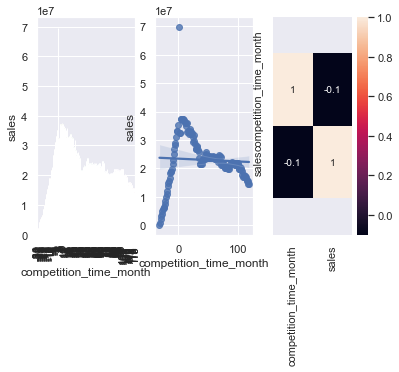

In [145]:
plt.subplot(1,3,1)

aux1= df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux2= aux1[(aux1['competition_time_month']  <120)&(aux1['competition_time_month'] !=0)]
sns.barplot(x='competition_time_month', y='sales', data=aux2);
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.regplot(x='competition_time_month', y='sales', data=aux2);
plt.subplot(1,3,3)
x=sns.heatmap(aux1.corr(method='pearson'),annot=True);
bottom, top=x.get_ylim()
x.set_ylim(bottom+0.5,top-0.5);

## LOJAS  COM PROMOÇÕES ATIVAS POR MAIS TEMPO DEVERIAM VENDER MAIS
#FALSO QUANTO MAIS TEMPO MENOS VENDE AS VENDAS CAEM.

ValueError: Could not interpret input 'promo_time_week'

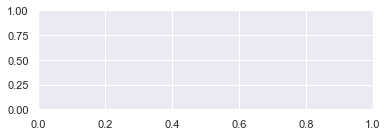

In [146]:

aux1= df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

plt.subplot(2,1,1)
sns.barplot(x='promo_time_week', y='sales', data=aux2);
aux2=aux1[aux1['promo_time_week']> 0]# promo extendido
plt.xticks(rotation=90)

plt.subplot(2,1,2)
aux3=aux1[aux1['promo_time_week']< 0]# promo regular
sns.barplot(x='promo_time_week', y='sales', data=aux3);

ValueError: Could not interpret input 'promo_time_week'

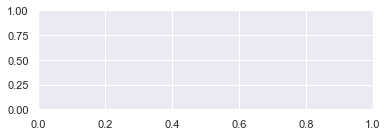

In [147]:
aux1= df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

plt.subplot(2,1,1)
sns.barplot(x='promo_time_week', y='sales', data=aux2);
aux2=aux1[aux1['promo_time_week']> 0]# promo extendido
plt.xticks(rotation=90)

plt.subplot(2,1,2)
aux3=aux1[aux1['promo_time_week']< 0]# promo regular
sns.barplot(x='promo_time_week', y='sales', data=aux3);

ValueError: Could not interpret input 'promo_time_week'

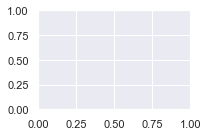

In [148]:
aux1= df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x='promo_time_week', y='sales', data=aux2);
aux2=aux1[aux1['promo_time_week']> 0]# promo extendido
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.regplot(x='promo_time_week', y='sales', data=aux3);

plt.subplot(2,2,3)
sns.barplot(x='promo_time_week', y='sales', data=aux2);
aux2=aux1[aux1['promo_time_week']> 0]# promo extendido
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.regplot(x='promo_time_week', y='sales', data=aux2);



ValueError: Could not interpret input 'promo_time_week'

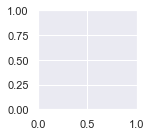

In [149]:
aux1= df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

grid=GridSpec(2,3)

plt.subplot (grid[0,0])
sns.barplot(x='promo_time_week', y='sales', data=aux2);
aux2=aux1[aux1['promo_time_week']> 0]# promo extendido
plt.xticks(rotation=90)

plt.subplot (grid[0,1])
sns.regplot(x='promo_time_week', y='sales', data=aux2);

plt.subplot (grid[1,0])
sns.barplot(x='promo_time_week', y='sales', data=aux3);
aux3=aux1[aux1['promo_time_week']> 0]# promo extendido
plt.xticks(rotation=90)

plt.subplot (grid[1,1])
sns.regplot(x='promo_time_week', y='sales', data=aux3);

plt.subplot (grid[:,2])
sns.heatmap(aux1.corr(method='pearson'),annot=True);


# LOJAS COM MAIS DIAS DE PROMOÇÃO DEVERIAM VENDER MAIS
#mesma coisa que a hipotese acima 

## LOJAS COM MAIS PROMOÇÕES CONSECUTIVAS DEVERIAM VENDER MAIS
#FALSA- AS LOJAS COM MAIS PROMOÇÕES CONSECUTIVAS  VENDEM MENOS

In [150]:
df4[['promo', 'promo2','sales']].groupby(['promo','promo2']).sum().reset_index()
#observamos que a loja que participou apenas da promo1 vendeu mais. Quem participou das 2 promoções vendeu razoavel

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


<AxesSubplot:>

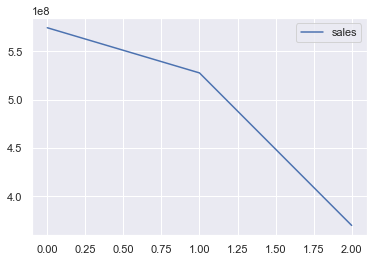

In [151]:
aux1= df4[(df4['promo']==1) & (df4['promo2']==1)] [['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux1.plot()

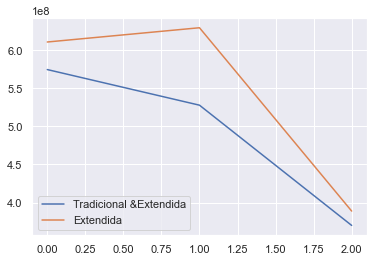

In [152]:
aux1= df4[(df4['promo']==1) & (df4['promo2']==1)] [['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax=aux1.plot()

aux2= df4[(df4['promo']==1) & (df4['promo2']==0)] [['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels=['Tradicional &Extendida', 'Extendida']);



## LOJAS ABERTAS DURANTE O FERIADO DE NATAL DEVERIAM VENDER MAIS
#FALSA . LOJAS ABERTAS DURANTE O FERIADO DE NATAL VENDEM MENOS

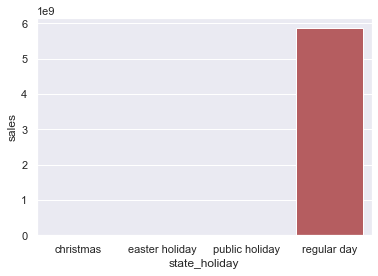

In [153]:
aux = df4[df4['state_holiday'] !='regular_day' ]
aux1= aux[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux1);

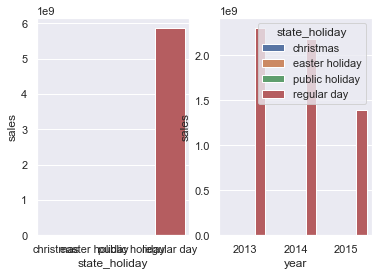

In [154]:

aux=df4[df4['state_holiday']!= 'regular_day'   ]

plt.subplot(1,2,1)
aux1= aux[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux1);

plt.subplot(1,2,2)
aux2= aux[['year', 'state_holiday', 'sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year', y='sales', hue='state_holiday',data=aux2);

## LOJAS DEVERIAM VENDER MAIS AO LONGO DOS ANOS
##FALSA AS VENDAS DE ACORDO COM OS GRÁFICOS AO LONGO DOS ANOS VENDEM MENOS. AS VENDAS ESTÃO CAINDO de acordo com os anos

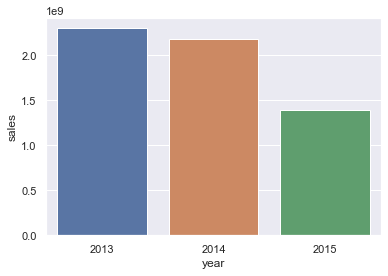

In [155]:

aux1= df4[['year','sales']].groupby('year').sum().reset_index()
sns.barplot(x='year', y='sales', data=aux1);



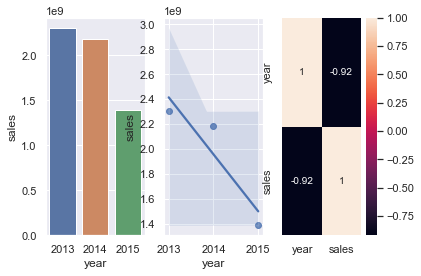

In [156]:

aux1= df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='year', y='sales', data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='year', y='sales', data=aux1);


plt.subplot(1,3,3)

sns.heatmap(aux1.corr(method='pearson'), annot=True);





## LOJAS DEVERIAM VENDER MAIS NO SEGUNDO SEMESTRE DO ANO
#FALSA. DE acordo com os gráficos as lojas vendem menos no segundo semestre, ocorrendo quedas das vendas

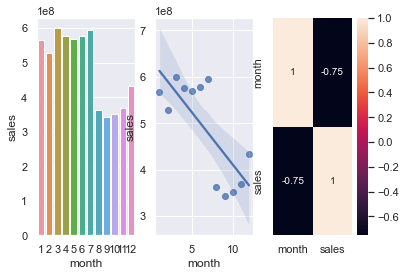

In [157]:

aux1= df4[['month','sales']].groupby('month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='month', y='sales', data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='month', y='sales', data=aux1);


plt.subplot(1,3,3)

sns.heatmap(aux1.corr(method='pearson'), annot=True);

## LOJAS DEVERIAM VENDER MAIS DEPOIS DO DIA 10 DE CADA MÊS
##VERDADEIRA. DE ACORDO COM OS GRÁFICOS AS VENDAS SÃO MAIORES DEPOIS DO DIA 10 DE CADA MÊS

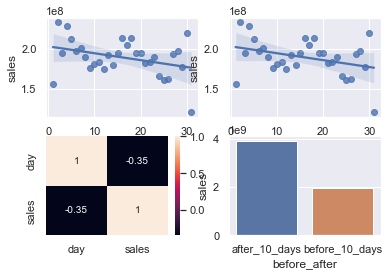

In [158]:
aux1= df4[['day','sales']].groupby('day').sum().reset_index()

plt.subplot(2,2,1)
sns.regplot(x='day', y='sales', data=aux1);

plt.subplot(2,2,2)
sns.regplot(x='day', y='sales', data=aux1);

plt.subplot(2,2,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

aux1['before_after']= aux1['day'].apply(lambda x:'before_10_days'if x<=10 else'after_10_days')
aux2= aux1[['before_after','sales']].groupby('before_after').sum().reset_index()
plt.subplot(2,2,4)                                   
sns.barplot(x='before_after', y='sales', data=aux2);                                    

## LOJAS DEVERIAM VENDER MENOS AOS FINAIS DE SEMANA
##VERDADEIRA- DE ACORDO COM OS GRÁFICOS VENDEM MENSO NO FINAL DE SEMANA

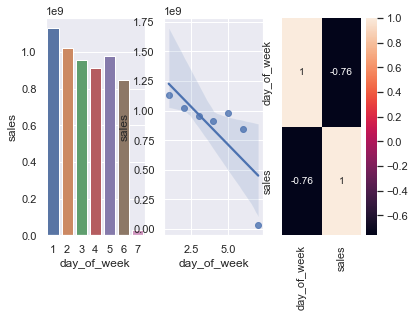

In [159]:

aux1= df4[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='day_of_week', y='sales', data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='day_of_week', y='sales', data=aux1);


plt.subplot(1,3,3)

sns.heatmap(aux1.corr(method='pearson'), annot=True);

## Lojas deveriam vender menos durante os feriados escolares
#Verdadeira.De acordo com os gráficos em epocas de feriados escolares vendem menos exceto os meses de julho e agosto(neste caso é Falsa)

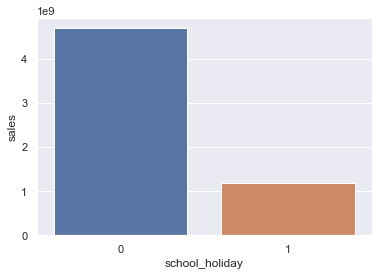

In [160]:
aux1= df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()

sns.barplot(x='school_holiday', y='sales', data=aux1);



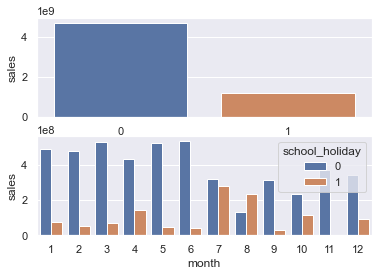

In [161]:
aux1= df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()

plt.subplot(2,1,1)
sns.barplot(x='school_holiday', y='sales', data=aux1);

aux2= df4[['month','school_holiday','sales']].groupby(['month','school_holiday']).sum().reset_index()
plt.subplot(2,1,2)
sns.barplot(x='month', y='sales', hue='school_holiday',data=aux2);



## 6.3 analise Multivariada

### 6.3.1 NUMERICAL ATTRIBUTES

<AxesSubplot:>

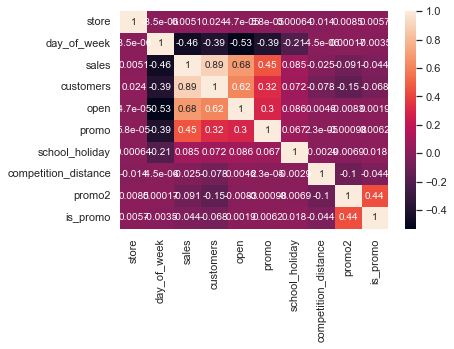

In [162]:
correlation= num_attributes.corr(method='pearson')
sns.heatmap(correlation,annot=True)

## CATEGORICAL ATTRIBUTES

In [163]:
from scipy.stats import chi2

In [164]:
import matplotlib.pyplot as plt

In [165]:
a=df4.select_dtypes(include='object')

In [166]:
a.head()

,state_holiday,store_type,assortment,year_week
0,regular day,c,basic,2015-&W
1,regular day,a,basic,2015-&W
2,regular day,a,basic,2015-&W
3,regular day,c,extended,2015-&W
4,regular day,a,basic,2015-&W


In [167]:
a[(a['state_holiday']== 'christmas')&(a['store_type']=='a')]

,state_holiday,store_type,assortment,year_week
241499,christmas,a,extended,2014-&W
241977,christmas,a,extended,2014-&W
616339,christmas,a,extended,2013-&W
616908,christmas,a,extended,2013-&W


In [168]:

cm=pd.crosstab(a['state_holiday'],a['store_type']).values 

In [169]:
def cramer_v(x,y):
    cm=pd.crosstab(x,y).values    
    n=cm.sum()
    chi2=ss.chi2_contingency(cm)[0]
    r,k=cm.shape
    return np.sqrt((chi2/n)/(min(k-1,r-1)))

In [170]:
chi2


In [171]:
cramer_v(a['state_holiday'], a ['store_type'])

0.07106457093267678

In [172]:
def cramer_v(x,y):
    cm=pd.crosstab(x,y).values 
    n=cm.sum()
    r,k=cm.shape
    chi2=ss.chi2_contingency(cm)[0]
    chi2corr= max(0,chi2-(k-1)*(r-1)/(n-1))
    kcorr= k- (k-1)**2/(n-1)
    rcorr= r- (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n)/(min(kcorr-1,rcorr-1)))

In [173]:
a= df4.select_dtypes(include='object')

In [174]:
a1=cramer_v(a['state_holiday'], a ['state_holiday'])
a2=cramer_v(a['state_holiday'], a ['store_type'])
a3=cramer_v(a['state_holiday'], a ['assortment'])



a4=cramer_v(a['store_type'], a ['state_holiday'])
a5=cramer_v(a['store_type'], a ['store_type'])
a6=cramer_v(a['store_type'], a ['assortment'])


a7=cramer_v(a['assortment'], a ['state_holiday'])
a8=cramer_v(a['assortment'], a ['store_type'])
a9=cramer_v(a['assortment'], a ['assortment'])

d=pd.DataFrame({'state_holiday':[a1,a2,a3],
              'store_type':[a4,a5,a6],
              'assortment':[a7,a8,a9]})
              
d=d.set_index(d.columns)              
                          

In [175]:
d

,state_holiday,store_type,assortment
state_holiday,1.000002,0.071065,0.067546
store_type,0.071065,1.000002,0.538457
assortment,0.067546,0.538457,1.000001


<AxesSubplot:>

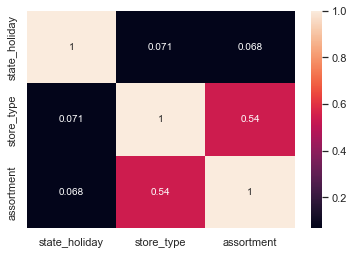

In [176]:
sns.heatmap(d,annot=True)

# 12 DADOS PREPARATÓRIOS


In [180]:
df5=df4.copy()

In [181]:
df5.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

## 12.1 NORMALIZAÇÃO

## 12.2 RESCALING

In [ ]:
df5.select_dtypes(include=['int64', 'float64'])

In [ ]:
a.head()

In [ ]:
sns.boxplot(df5['competition_distance'])

In [ ]:
sns.boxplot(df5['competition_time_month'])

In [ ]:
sns.boxplot(df5['promo_time_week'])

In [ ]:
rs

In [ ]:
rs=RobustScaler()
mms=MinMaxScaler()
#competition distance
df5['competition_distance']=rs.fit_transform(df5[['competition_distance']].values)

#competition time month
df5['competition_time_month']=rs.fit_transform(df5[['competition_time_month']].values)

#year
df5['year']=mms.fit_transform(df5[['year']].values)
#promo_time_week
df5['promo_time_week']=mms.fit_transform(df5[['promo_time_week']].values)


In [ ]:
sns.displot(df5['competition_distance'])

## 12.3 TRANSFORMAÇÃO

In [ ]:
#month
#day
#week of year
#day of week

## Enconding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df5.head()

NameError: name 'df5' is not defined

In [18]:
df5.head()

NameError: name 'df5' is not defined

In [177]:
# state_holiday
df5=pd.get_dummies(df5,prefix=['state_holiday'],columns=['state_holiday'])
#store_holiday
le=LabelEnconder()
df5['store_type']=le.fit_transform(df5['store_type'])
#assortment
assortment_dict={'basic':1,'extra':2,'extendend':3}
df5['assortment']=df5['assortment'].map(assortment_dict)

KeyError: "None of [Index(['state_holiday'], dtype='object')] are in the [columns]"

In [151]:
df5['sales']=np.log1p(df5['sales'])

C:\Users\FLAVIA\anaconda3\envs\machineflavia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

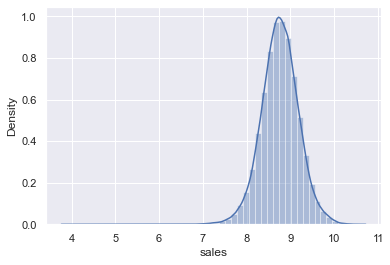

In [152]:
sns.distplot(df5['sales'])

In [153]:
df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter holiday,state_holiday_public holiday,state_holiday_regular day,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
0,1,5,2015-07-31,8.568646,1,1,c,basic,-0.170968,9,2008,0,31,2015,0,1.0,7,31,31,2015-&W,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984
1,2,5,2015-07-31,8.710290,1,1,a,basic,-0.283871,11,2007,1,13,2010,1,1.0,7,31,31,2015-&W,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984
2,3,5,2015-07-31,9.025816,1,1,a,basic,1.903226,12,2006,1,14,2011,1,1.0,7,31,31,2015-&W,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984
3,4,5,2015-07-31,9.546527,1,1,c,extended,-0.275806,9,2009,0,31,2015,0,1.0,7,31,31,2015-&W,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984
4,5,5,2015-07-31,8.481151,1,1,a,basic,4.448387,4,2015,0,31,2015,0,1.0,7,31,31,2015-&W,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984


# 12.5 Response Variable Transformation

## 12.5.1  Nature Transformation

In [160]:
#day of week
df5['day_of_week_sin']=   df5['day_of_week'].apply(lambda x:np.sin (x*(2.*np.pi/7)))
df5['day_of_week_cos']=   df5['day_of_week'].apply(lambda x:np.cos (x*(2.*np.pi/7)))

#month
df5['month_sin']=   df5['month'].apply(lambda x:np.sin (x*(2.*np.pi/12)))
df5['month_cos']=   df5['month'].apply(lambda x:np.cos (x*(2.*np.pi/12)))
#day
df5['day_sin']=   df5['day'].apply(lambda x:np.sin (x*(2.*np.pi/30)))
df5['day_cos']=   df5['day'].apply(lambda x:np.cos (x*(2.*np.pi/30)))
# week of year
df5['week_of_year_sin']=   df5['week_of_year'].apply(lambda x:np.sin (x*(2.*np.pi/52)))
df5['week_of_year_cos']=   df5['week_of_year'].apply(lambda x:np.cos (x*(2.*np.pi/52)))

In [161]:
df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter holiday,state_holiday_public holiday,state_holiday_regular day,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
0,1,5,2015-07-31,8.568646,1,1,c,basic,-0.170968,9,2008,0,31,2015,0,1.0,7,31,31,2015-&W,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984
1,2,5,2015-07-31,8.710290,1,1,a,basic,-0.283871,11,2007,1,13,2010,1,1.0,7,31,31,2015-&W,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984
2,3,5,2015-07-31,9.025816,1,1,a,basic,1.903226,12,2006,1,14,2011,1,1.0,7,31,31,2015-&W,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984
3,4,5,2015-07-31,9.546527,1,1,c,extended,-0.275806,9,2009,0,31,2015,0,1.0,7,31,31,2015-&W,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984
4,5,5,2015-07-31,8.481151,1,1,a,basic,4.448387,4,2015,0,31,2015,0,1.0,7,31,31,2015-&W,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,0.207912,0.978148,-0.568065,-0.822984


# APLICAÇÃO DO BORUTA 

## FEATURE SELECTION

In [15]:
df6=df5.copy()

NameError: name 'df5' is not defined

## 14.2 Slpit Data Frame into training and test dataset

In [194]:
df6.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-&W,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-&W,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-&W,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-&W,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-&W,2015-04-01,4,2015-07-27,0


In [195]:
cols_drop= ['week_of_year','day','month','day_of_week','promo_since','competition_since','year_week','store_type','assortment','state_holiday']
df6 = df6.drop(cols_drop,axis=1)

## 14.3 Boruta  as Feature Selector

In [196]:
df6[['store','date']].groupby('store').max().reset_index()['date'][0]-datetime.timedelta(days=6*7)

Timestamp('2015-06-19 00:00:00')

In [197]:
#training dataset
x_train=df6[df6['date']<'2015-06-19']
y_train=x_train['sales']
#test dataset
x_test=df6[df6['date']>='2015-06-19']
y_test=x_test['sales']

print('training Min Date:{}'.format(x_train['date'].min() ) )
print('training Max Date:{}'.format(x_train['date'].max() ) )

print('\ntest Min Date:{}'.format(x_test['date'].min() ) )
print('test Max Date:{}'.format(x_test['date'].max() ) )


training Min Date:2013-01-01 00:00:00
training Max Date:2015-06-18 00:00:00

test Min Date:2015-06-19 00:00:00
test Max Date:2015-07-31 00:00:00


In [198]:

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor


In [199]:
x_train.head()

,store,date,sales,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,competition_time_month,promo_time_week
47945,1,2015-06-18,4645,1,0,1270.0,9,2008,0,25,2015,0,2015,82,0
47946,2,2015-06-18,5154,1,0,570.0,11,2007,1,13,2010,0,2015,92,273
47947,3,2015-06-18,7537,1,0,14130.0,12,2006,1,14,2011,0,2015,104,220
47948,4,2015-06-18,8880,1,0,620.0,9,2009,0,25,2015,0,2015,70,0
47949,5,2015-06-18,4924,1,0,29910.0,4,2015,0,25,2015,0,2015,2,0


In [200]:
#training and test dataset for boruta
x_train_n= x_train.drop(['date','sales'],axis=1).values
y_train_n= y_train.values.ravel()
#define randomforestRegress
rf=RandomForestRegressor(n_jobs=-1)
#define boruta
boruta = BorutaPy(rf,n_estimators='auto',verbose=2,random_state=42).fit(x_train_n,y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	6


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	6


In [201]:
cols_selected=boruta.support_.tolist()
#best feature
x_train_fs=x_train.drop(['date','sales'],axis=1)
cols_selected_boruta=x_train_fs.iloc[:,cols_selected].columns.to_list()
#not selected boruta
cols_not_selected_boruta=np.setdiff1d(x_train_fs.columns,cols_selected_boruta)

In [202]:
cols_selected_boruta

['store',
 'promo',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2_since_week',
 'competition_time_month']

In [203]:
cols_not_selected_boruta

array(['is_promo', 'promo2', 'promo2_since_year', 'promo_time_week',
       'school_holiday', 'year'], dtype=object)

In [204]:
from tabulate import tabulate

# Manual Feature from Boruta

In [9]:
cols_not_selected_boruta=[
    'store',
 'promo',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'day_of_week_sin',
 'day_of_week_cos',
  'month_sin',  
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_sin',
 'week_of_year_cos']
# columns to add
 feat_to_add=['date','sales']
 # final features

cols_selected_boruta.extend(feat_to_add)

IndentationError: unexpected indent (Temp/ipykernel_46504/1561193994.py, line 21)

In [10]:
cols_selected_boruta

NameError: name 'cols_selected_boruta' is not defined

## 16. MACHINE LEARNING MODELLING

In [11]:
x_train=x_train[cols_selected_boruta]
x_test=x_test[cols_selected_boruta]

NameError: name 'x_train' is not defined

## 16.1 Average Model

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [13]:
def mean_absolute_percentage_error(y,yhat):
    return np.mean(np.abs((y-yhat)/y))

def ml_error(model_name,y,yhat):
    mae=mean_absolute_error(y,yhat)
    mape=mean_absolute_percentage_error(y,yhat)
    rmse=np.sqrt(mean_squared_error(y,yhat))

    return pd.DataFrame ( {'Model Name':model_name,
                       'Mae':mae,
                       'Mape':mape,
                       'RMSE':rmse,},index=[0])

In [14]:
aux1=x_test.copy()
aux1['sales']=y_test.copy()
#predictions
aux2=aux1[['store','sales']].groupby('store').mean().reset_index().rename(columns={'sales':'predictions'})
aux1=pd.merge(aux1,aux2,how='left',on='store')
yhat_baseline=aux1['predictions']

#perfomance
baseline_result=ml_error('Average Model',np.expm1(y_test),np.expm1(yhat_baseline ))
baseline_result

NameError: name 'x_test' is not defined